In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [29]:
df.rename(columns={'Award?':'Aqard','ID#':'ID'},inplace=True)

In [30]:
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Aqard
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [31]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Aqard
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [33]:
df.duplicated().sum()

1

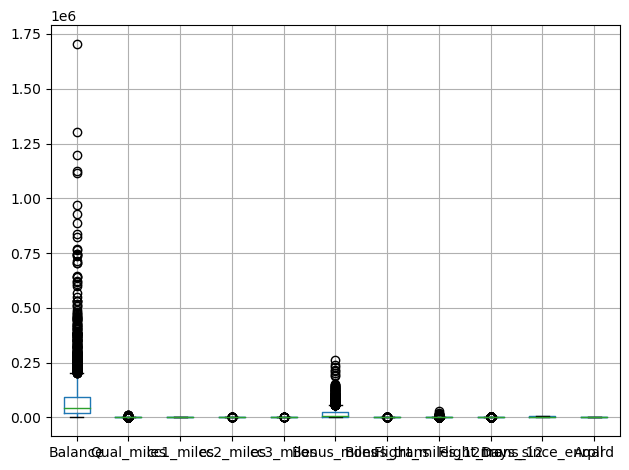

In [34]:
df.boxplot()
plt.tight_layout()

In [35]:
df.shape                       

(3999, 11)

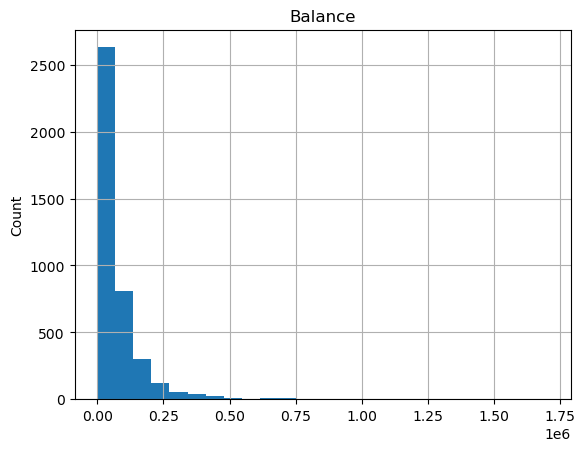

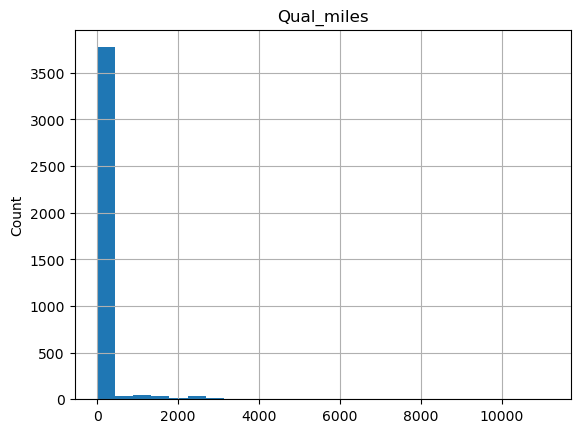

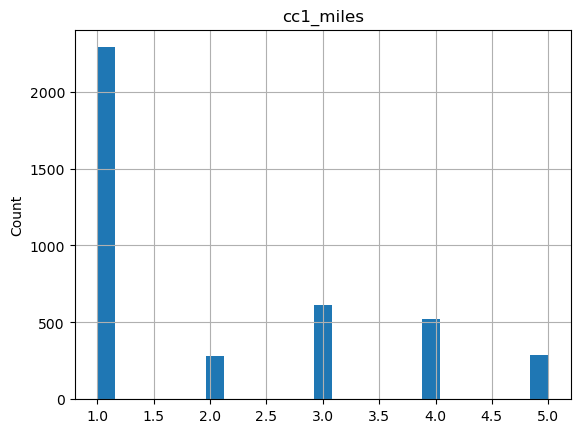

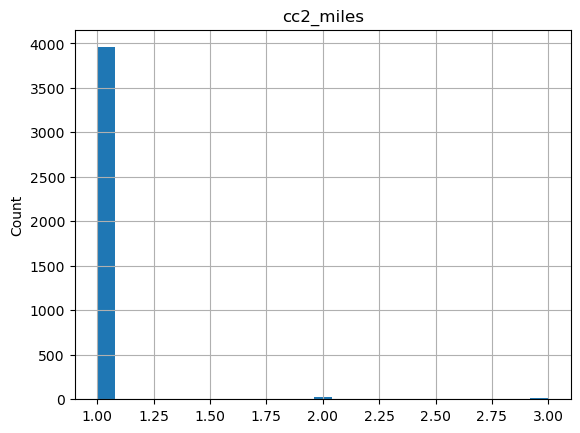

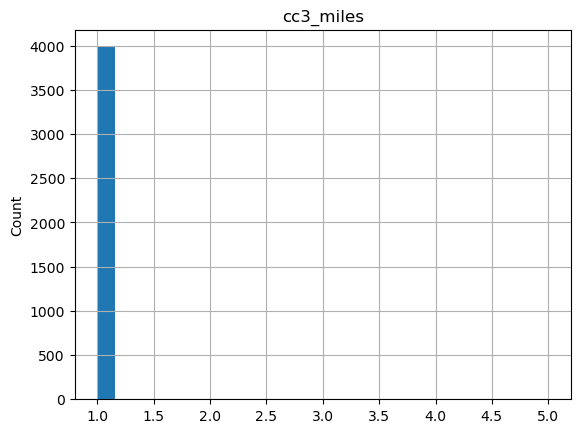

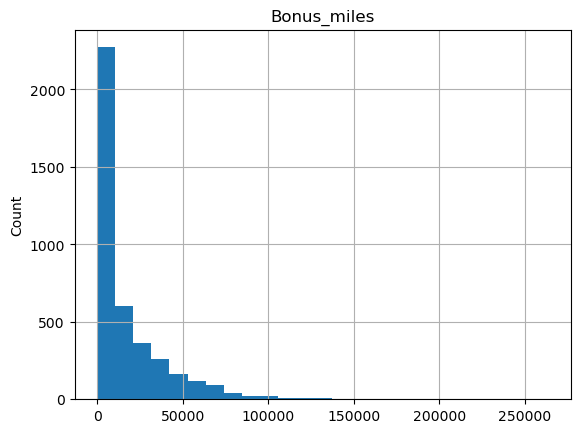

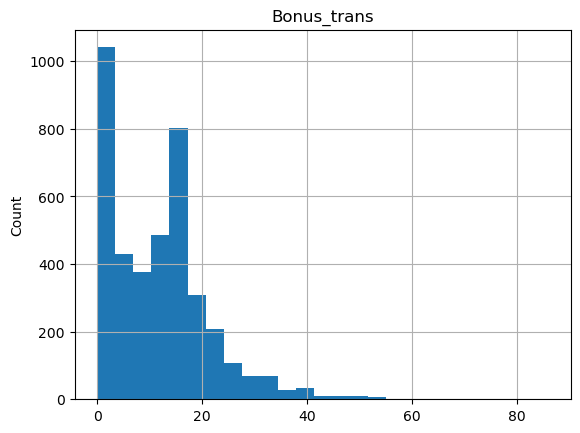

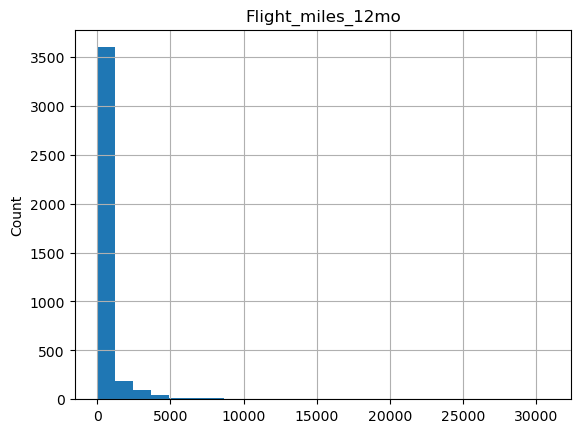

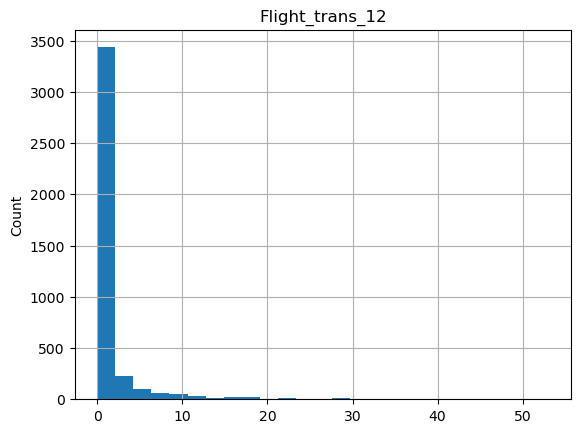

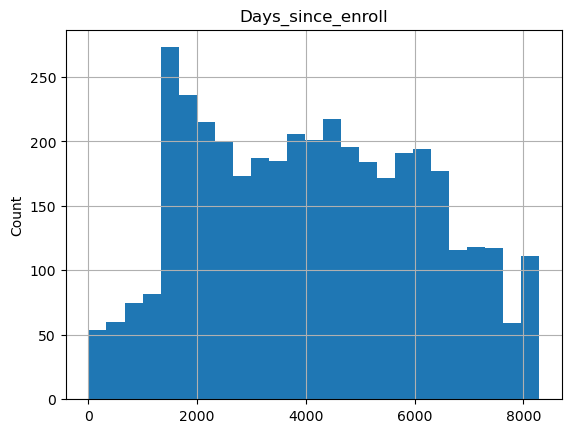

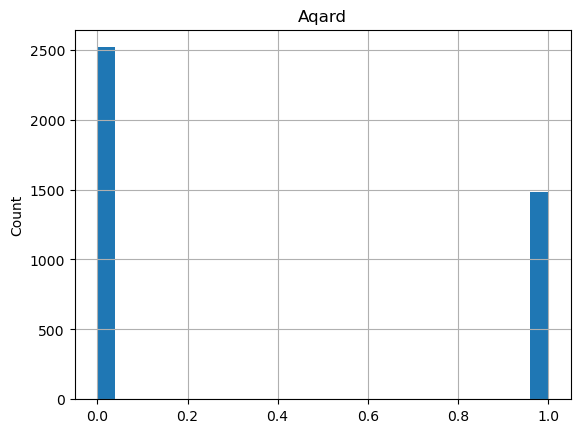

In [36]:
for feature in df.columns:
    df=df.copy()
    df[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [37]:
sc = StandardScaler()
x = sc.fit_transform(df.iloc[:,1:])
x

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [38]:
y = pd.DataFrame(sc.fit_transform(df.iloc[:,1:]),columns=df.iloc[:,1:].columns)


## Data Mining with Hierarchical cluster

In [39]:
from scipy.cluster import hierarchy

In [40]:
lk = hierarchy.linkage(x,method='complete')

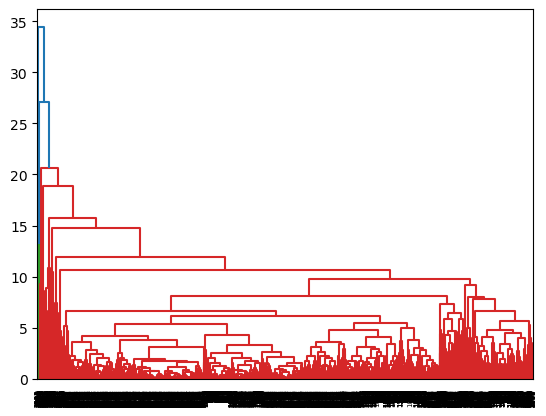

In [41]:
dendogram = hierarchy.dendrogram(lk)
xlabel = 'number of data'
ylabel = 'difference between Clustering_ for crime data set.ipynb'

In [42]:
hc = AgglomerativeClustering()
ylabel = hc.fit_predict(x)

In [43]:
ylabel

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [45]:
df['cluster'] = ylabel
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Aqard,cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


## KMeans cluster

In [46]:
from sklearn.cluster import KMeans

In [47]:
km = KMeans()

cluster = km.fit_predict(x)
cluster

array([2, 2, 2, ..., 3, 6, 6])

In [48]:
wcss =[]

for i in range(1,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    wcss.append(km.inertia_)

In [49]:
wcss

[39990.0,
 31994.059340796623,
 27514.968873977614,
 23772.74487296189,
 20301.595314753005,
 18140.916339519135,
 15737.659536759405,
 13960.059411983777,
 12704.545791625096,
 11704.395737197712,
 10863.705838174332,
 10411.269810971455,
 9850.675901842309,
 9391.741674038778,
 9075.827275714522,
 8638.273914149571,
 8377.521469754342,
 7930.764223702151,
 7680.344211683153]

Text(0, 0.5, 'wcss')

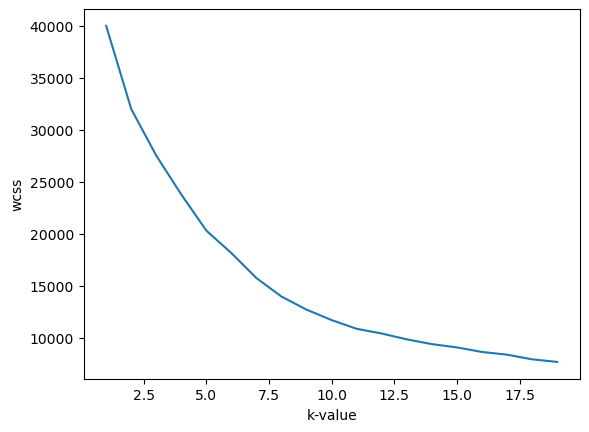

In [50]:
plt.plot(range(1,20),wcss)
plt.xlabel('k-value')
plt.ylabel('wcss')

In [51]:
km = KMeans(n_clusters=7)
y_label = km.fit_predict(x)
y_label

array([2, 2, 2, ..., 6, 2, 2])

In [52]:
km.cluster_centers_

array([[ 7.04065804e+00, -4.31702374e-03, -9.82418871e-02,
        -6.27665798e-02,  9.55601842e-02,  7.67900892e-02,
         3.48255260e-01,  3.91159384e-01, -1.08916294e-01,
         3.05478671e-01],
       [-1.00267457e-01,  1.52884789e+00, -9.82418871e-02,
        -5.09088912e-02,  1.31878297e+00,  8.82037200e-01,
        -4.71848464e-02, -4.75403936e-02,  4.19134201e-01,
         4.69830850e-01],
       [-1.44972180e-01, -5.31293871e-01, -9.82418871e-02,
        -6.03097350e-02, -5.06723591e-01, -4.55609693e-01,
        -2.17791294e-01, -2.40009623e-01, -2.20525765e-01,
        -7.66919299e-01],
       [-8.44329231e-02,  1.02208440e+00, -9.82418871e-02,
         1.56462993e+01,  3.17969131e+00,  1.71461374e+00,
         3.32926913e-02,  5.96953922e-02,  2.39872612e-01,
         3.37527346e-01],
       [-1.56235600e-01, -6.68227273e-01,  9.03825361e+00,
        -6.27665798e-02, -1.01665326e-01,  6.17851143e-01,
         8.75493989e-02,  2.20346809e-01, -7.24639805e-02,
         5.

In [53]:
x = pd.DataFrame(x)

In [54]:
df['record'] = y_label

In [55]:
df.groupby('record').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Aqard,cluster
record,,,,,,,,,,,,
0,115243.642857,5590.535714,2.053571,1.000000,1.000000,19452.428571,12.339286,947.625000,2.857143,3893.660714,0.517857,0.178571
1,130380.003472,66.550926,4.164352,1.000000,1.002315,48990.748843,20.071759,393.995370,1.193287,4984.019676,0.597222,0.015046
2,45331.720384,31.968825,1.328058,1.000000,1.000480,4908.511271,7.226859,155.140528,0.463309,3663.200959,0.000000,0.827818
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.000000
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,1.000000
5,168254.958678,471.165289,2.305785,1.000000,1.000000,35148.925620,29.983471,6161.743802,17.842975,4641.537190,0.793388,0.000000
6,67879.314110,98.031902,1.685890,1.000000,1.000000,10573.067485,10.419632,422.812270,1.298160,4302.587730,1.000000,0.575460


In [56]:
x

,0,1,2,3,4,5,6,7,8,9
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [57]:
from sklearn.cluster import DBSCAN

In [58]:
db = DBSCAN()

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
silhouette_score(x,db.fit_predict(x))

-0.004546813430611622

In [61]:
db = DBSCAN(eps=1,min_samples=7)
y_label2 = db.fit_predict(x) 

In [62]:
y_label2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
silhouette_score(x,db.fit_predict(x))

0.24057774451843722

In [64]:
db = DBSCAN(eps=2,min_samples=7)
y_label2 = db.fit_predict(x)

In [65]:
silhouette_score(x,db.fit_predict(x))

0.2834837335428448

In [66]:
y_label2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
df['cluster'] = y_label2

In [68]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Aqard,cluster,record
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,6
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,6
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,6
